In [1]:
import math
import cv2
import os
import math
import numpy as np
from matplotlib import pyplot as plt

from utils_hha.rgbd_util import processDepthImage
from utils_hha.getCameraParam import getCameraParam

In [2]:
root='../nyudv2'

In [3]:
def getImage (filename) :
    # D = cv2.imread(os.path.join(root, "depth", filename), cv2.COLOR_BGR2GRAY)/10000
    D = np.load(os.path.join(root, "depth", filename))
    return D

In [4]:
def getHHA(D, RD):
    '''
        D: Depth image, the unit of each element in it is "meter"
        RD: Raw depth image, the unit of each element in it is "meter"
    '''
    C = getCameraParam('depth')

    missingMask = (RD == 0);
    pc, N, yDir, h, pcRot, NRot = processDepthImage(D * 100, missingMask, C);

    tmp = np.multiply(N, yDir)
    acosValue = np.minimum(1,np.maximum(-1,np.sum(tmp, axis=2)))
    angle = np.array([math.degrees(math.acos(x)) for x in acosValue.flatten()])
    angle = np.reshape(angle, h.shape)

    # Must convert nan to 180 as the MATLAB program actually does. 
    angle[np.isnan(angle)] = 180        

    pc[:,:,2] = np.maximum(pc[:,:,2], 100)
    I = np.zeros(pc.shape)

    I[:,:,2] = 31000/pc[:,:,2]
    I[:,:,1] = h
    I[:,:,0] = (angle + 128-90)

    I = np.rint(I)
    I[I>255] = 255
    HHA = I.astype(np.uint8)
    return HHA




phi =============  [0.12887803]
phi[0] =============  0.12887802509686405



-ax[2] =============  [-0.27684759]
-ax[2][0] =============  -0.276847589313457



ax[1] =============  [-0.]
ax[1][0] =============  -0.0



-ax[0] =============  [-0.96091384]
-ax[0][0] =============  -0.9609138422831296



-ax[1] =============  [0.]
-ax[1][0] =============  0.0



np.sin(phi) =================  [0.12852155]
np.sin(phi)[0] =================  0.12852155369993495



R ======================  [[ 0.99936436 -0.03558088  0.00220623]
 [ 0.03558088  0.99170672 -0.12349814]
 [ 0.00220623  0.12349814  0.99234235]]


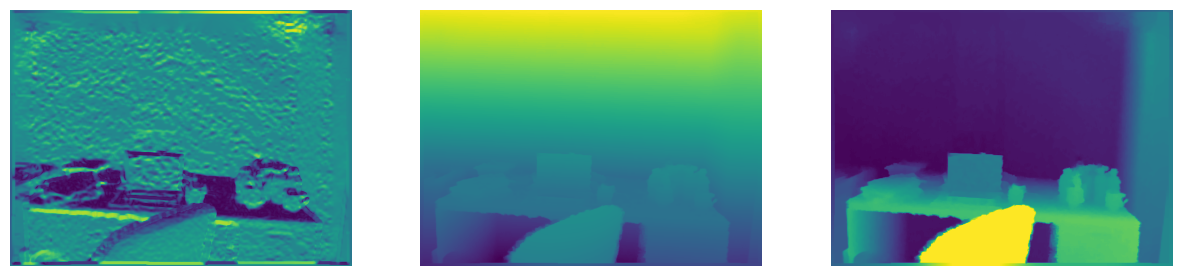

In [5]:
image_num = '3'

D = getImage(f"{image_num}.npy")
hha_complete = getHHA(D, D)
cv2.imwrite(os.path.join(root, "hha", f"{image_num}.png"), hha_complete)

_, subplts = plt.subplots(1, 3, figsize=(15, 15))
subplts[0].imshow(hha_complete[:, :, 0])
subplts[0].axis('off')
subplts[1].imshow(hha_complete[:, :, 1])
subplts[1].axis('off')
subplts[2].imshow(hha_complete[:, :, 2])
subplts[2].axis('off')
plt.show()

In [6]:
''' multi-peocessing example '''
'''
from multiprocessing import Pool

def generate_hha(i):
    # generate hha for the i-th image
    return

processNum = 16
pool = Pool(processNum)

for i in range(img_num):
    print(i)
    pool.apply_async(generate_hha, args=(i,))
    pool.close()
    pool.join()
'''

'\nfrom multiprocessing import Pool\n\ndef generate_hha(i):\n    # generate hha for the i-th image\n    return\n\nprocessNum = 16\npool = Pool(processNum)\n\nfor i in range(img_num):\n    print(i)\n    pool.apply_async(generate_hha, args=(i,))\n    pool.close()\n    pool.join()\n'